In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4 as bs
import tweepy
from tweepy import OAuthHandler
import json
import requests
%matplotlib inline

## Gather

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
image_preds_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_preds_url)
response

<Response [200]>

In [4]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
image_preds = pd.read_csv('image-predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

failed_tweets = []

with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            file.write(json.dumps(tweet) + '\n')
        except:
            print('Tweets Failed to be found!')
            failed_tweets.append(tweet_id)

print ('Tweets Compiled in txt file.')



In [6]:
tweet_id = []
retweets = []
favorite = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        json_data = json.loads(line)
        tweet_id.append(json_data['id'])
        retweets.append(json_data['retweet_count'])
        favorite.append(json_data['favorite_count'])

tweet_data = pd.DataFrame({'tweet_id': tweet_id, 'retweet_counts': retweets, 'favorite_counts': favorite})

In [7]:
tweet_data.head()

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,7549,35693
1,892177421306343426,5595,30862
2,891815181378084864,3707,23207
3,891689557279858688,7723,38973
4,891327558926688256,8329,37219


## Assess

#### Visually assessing the data
visually assessing the three dataframes to check ambiguities

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None


In [10]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_preds.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,Chihuahua,0.841084,True,Pomeranian,0.120530,True,Pekinese,0.006600,True
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True


In [12]:
tweet_data.head()

,tweet_id,retweet_counts,favorite_counts
0,892420643555336193,7549,35693
1,892177421306343426,5595,30862
2,891815181378084864,3707,23207
3,891689557279858688,7723,38973
4,891327558926688256,8329,37219


In [13]:
tweet_data.sample(2)

,tweet_id,retweet_counts,favorite_counts
1840,675354435921575936,16023,31186
1126,726224900189511680,1115,4334


#### Programatically Assessing the Data


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_counts   2331 non-null   int64
 2   favorite_counts  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [19]:
tweet_data.describe()

,tweet_id,retweet_counts,favorite_counts
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2653.152724,7455.903046
std,6.823170e+16,4487.191431,11574.427110
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,537.000000,1297.000000
50%,7.182469e+17,1242.000000,3243.000000
75%,7.986692e+17,3080.500000,9130.500000
max,8.924206e+17,76249.000000,153835.000000


In [20]:
twitter_archive[twitter_archive.tweet_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Malikai       1
Sundance      1
Mingus        1
Gustav        1
Meatball      1
Name: name, Length: 957, dtype: int64

### Quality Issues
    twitter_archive dataset: Wrong Datatypes of the columns like tweet_id, timestamp.
    image_preds and tweet_data: Wrong Datatype of column tweet_id.
    Missing tweets.
    Duplicated Data.
    some of the dog names are none and ambiguous.
    columns related to retweets and reply are of no use because we are checking the rating of the dogs.
    
### Tideness Issues
    All the dataframe should be one dataframe merge according to the tweet_id.
    doggo, floofer, pupper and puppo categorically should be in one column.
    
    

After cleaning the above mentioned Issues we will reassess the data for further cleaning with combined dataframe.
## Data Cleaning
First of all we will copy the original data before starting cleaning process

In [23]:
twitter_archive_clean = twitter_archive.copy()
image_preds_clean = image_preds.copy()
tweet_data_clean = tweet_data.copy()

### Quality Tasks

#### Define
Drop the additional columns which are not related to the rating of the dogs. those columns are mostly related to retweets and reply status.

#### Code

In [24]:
twitter_archive_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace= True )

#### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define
Converting the datatypes of the columns like tweet_id to string and timestamp to datetime.

#### Code

In [26]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str') 

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

image_preds_clean.tweet_id = image_preds_clean.tweet_id.astype('str')

tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype('str')

#### Test

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [28]:
image_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [29]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   retweet_counts   2331 non-null   int64 
 2   favorite_counts  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Tidiness Tasks

#### Define
Merge all three dataframes into one dataframe according to tweet_id

#### Code

In [30]:
# Merging twitter_archive_clean and image_preds_clean using inner method to fetch the tweets which are on both tables.
twitter_archive_clean = pd.merge(twitter_archive_clean, image_preds_clean, on='tweet_id', how= 'inner')

# Merging twitter_archive_clean and tweet_data_clean with inner method as above
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, on= 'tweet_id', how= 'inner')

#### Test

In [31]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7549,35693
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5595,30862
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3707,23207
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7723,38973
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8329,37219


In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   int64              
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   doggo               2059 non-null   object             
 9   floofer             2059 non-null   object             
 10  pupper              2059 non-null   object             
 11  puppo               2059 non-null   object             
 12  jpg_url             2059 non-null 

#### Define
Now merge the doggo, floofer, pupper and puppo into one column as a category type and use np.nan to replace the None values in the column.

#### Code

In [33]:
all_dogs = ['doggo', 'floofer', 'pupper', 'puppo']

twitter_archive_clean[all_dogs] = twitter_archive_clean[all_dogs].replace('None', np.nan)
twitter_archive_clean['dogs'] = twitter_archive_clean[all_dogs].apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
twitter_archive_clean.dogs = twitter_archive_clean.dogs.replace('', np.nan)
twitter_archive_clean.dogs = twitter_archive_clean.dogs.astype('category')


In [34]:
# Dropping doggo, floofer, pupper and puppo
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   int64              
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   jpg_url             2059 non-null   object             
 9   img_num             2059 non-null   int64              
 10  p1                  2059 non-null   object             
 11  p1_conf             2059 non-null   float64            
 12  p1_dog              2059 non-null 

In [36]:
twitter_archive_clean.dogs.value_counts()

pupper            210
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dogs, dtype: int64

Now we will reassess the data for additional quality and tidiness issues that are present after merging the dataframes and cleaning some of the data.
### Reassessing the Data

In [37]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dogs
756,753026973505581056,2016-07-13 00:43:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tayzie. She's a Barbadian Bugaboo...,https://twitter.com/dog_rates/status/753026973...,10,10,Tayzie,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,...,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True,950,3891,NaN
1601,674781762103414784,2015-12-10 02:44:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,https://twitter.com/dog_rates/status/674781762...,8,10,None,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,...,False,hamster,0.068985,False,wool,0.031728,False,1134,1918,NaN
1944,667924896115245057,2015-11-21 04:37:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg,1,...,True,hog,0.203980,False,Newfoundland,0.165914,True,100,277,NaN
1138,701981390485725185,2016-02-23 04:06:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,...,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True,968,3389,NaN
1026,711694788429553666,2016-03-20 23:23:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh. My. God. 13/10 magical af https://t.co/Ezu...,https://twitter.com/dog_rates/status/711694788...,13,10,None,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,...,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False,17901,32165,NaN


In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   int64              
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   jpg_url             2059 non-null   object             
 9   img_num             2059 non-null   int64              
 10  p1                  2059 non-null   object             
 11  p1_conf             2059 non-null   float64            
 12  p1_dog              2059 non-null 

In [39]:
# Checking the rating numerator and denominator

print (twitter_archive_clean.rating_numerator.head())
print (twitter_archive_clean.rating_denominator.head())

0    13
1    13
2    12
3    13
4    12
Name: rating_numerator, dtype: int64
0    10
1    10
2    10
3    10
4    10
Name: rating_denominator, dtype: int64


In [40]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dogs
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,7549,35693,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5595,30862,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,3707,23207,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7723,38973,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8329,37219,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,666826780179869698,2015-11-18 03:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,https://twitter.com/dog_rates/status/666826780...,12,10,None,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,...,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True,84,238,NaN
2027,666421158376562688,2015-11-17 01:02:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,12,10,None,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,...,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True,102,294,NaN
2032,666373753744588802,2015-11-16 21:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,11,10,None,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,...,True,Afghan_hound,0.259551,True,briard,0.206803,True,79,171,NaN
2039,666273097616637952,2015-11-16 15:14:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097...,11,10,None,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,...,True,toy_terrier,0.111884,True,basenji,0.111152,True,70,159,NaN


In [41]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dogs
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,8852,42398,NaN
181,848212111729840128,2017-04-01 16:35:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,...,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,2923,15926,NaN
241,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,...,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,2954,22154,NaN
578,781661882474196992,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,...,True,golden_retriever,0.226954,True,collie,0.070652,True,2715,10451,NaN
604,777885040357281792,2016-09-19 15:00:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,...,True,basset,0.119682,True,Siberian_husky,0.108709,True,1627,6341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,40,96,NaN
2055,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,126,265,NaN
2056,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,True,malinois,0.138584,True,bloodhound,0.116197,True,39,111,NaN
2057,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,41,120,NaN


In [42]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dogs
336,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3216,12212,NaN
722,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,...,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2187,4753,NaN
863,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,13053,34415,NaN
911,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,1237,3762,NaN
954,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,...,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1526,4018,NaN
988,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,204,2333,NaN
1009,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,...,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,721,2774,NaN
1034,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,...,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,546,2259,NaN
1052,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,...,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,630,2392,NaN
1118,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,...,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,897,2867,NaN


In [43]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_counts,favorite_counts,dogs
406,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1446,5358,NaN
2038,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,58,133,NaN


In [44]:
# Checking the maximum and minimum values of numerator and denominator rating

print ('Max Numerator is:',twitter_archive_clean.rating_numerator.max())
print ('Min Numerator is:',twitter_archive_clean.rating_numerator.min())
print ('Max Denominator is:',twitter_archive_clean.rating_denominator.max())
print ('Min Denominator is:',twitter_archive_clean.rating_denominator.min())

Max Numerator is: 1776
Min Numerator is: 0
Max Denominator is: 170
Min Denominator is: 2


In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   int64              
 6   rating_denominator  2059 non-null   int64              
 7   name                2059 non-null   object             
 8   jpg_url             2059 non-null   object             
 9   img_num             2059 non-null   int64              
 10  p1                  2059 non-null   object             
 11  p1_conf             2059 non-null   float64            
 12  p1_dog              2059 non-null 

In [46]:
twitter_archive_clean.p1.head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object

In [47]:
twitter_archive_clean.p2.head()

0                 bagel
1              Pekinese
2              malamute
3    Labrador_retriever
4      English_springer
Name: p2, dtype: object

In [48]:
twitter_archive_clean.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German_short-haired_pointer
Name: p3, dtype: object

In [49]:
twitter_archive_clean.p1_dog.head()

0    False
1     True
2     True
3    False
4     True
Name: p1_dog, dtype: bool

In [50]:
twitter_archive_clean.p2_dog.head()

0    False
1     True
2     True
3     True
4     True
Name: p2_dog, dtype: bool

In [51]:
twitter_archive_clean.p3_dog.head()

0    False
1     True
2     True
3    False
4     True
Name: p3_dog, dtype: bool

In [52]:
twitter_archive_clean.loc[twitter_archive_clean.p1_dog == False, ['text']]

,text
0,This is Phineas. He's a mystical boy. Only eve...
3,This is Darla. She commenced a snooze mid meal...
21,I've yet to rate a Venezuelan Hover Wiener. Th...
27,This is Derek. He's late for a dog meeting. 13...
47,"This is Koko. Her owner, inspired by Barney, r..."
...,...
2037,This is a funny dog. Weird toes. Won't come do...
2040,Very concerned about fellow dog trapped in com...
2041,Not familiar with this breed. No tail (weird)....
2050,My oh my. This is a rare blond Canadian terrie...


In [53]:
twitter_archive_clean.loc[twitter_archive_clean.p2_dog == False, ['text']]

,text
0,This is Phineas. He's a mystical boy. Only eve...
21,I've yet to rate a Venezuelan Hover Wiener. Th...
23,You may not have known you needed to see this ...
27,This is Derek. He's late for a dog meeting. 13...
29,This is Waffles. His doggles are pupside down....
...,...
2037,This is a funny dog. Weird toes. Won't come do...
2040,Very concerned about fellow dog trapped in com...
2041,Not familiar with this breed. No tail (weird)....
2050,My oh my. This is a rare blond Canadian terrie...


In [54]:
twitter_archive_clean.loc[twitter_archive_clean.p3_dog == False, ['text']]

,text
0,This is Phineas. He's a mystical boy. Only eve...
3,This is Darla. She commenced a snooze mid meal...
5,Here we have a majestic great white breaching ...
6,Meet Jax. He enjoys ice cream so much he gets ...
11,This is Bruno. He is a service shark. Only get...
...,...
2037,This is a funny dog. Weird toes. Won't come do...
2040,Very concerned about fellow dog trapped in com...
2041,Not familiar with this breed. No tail (weird)....
2051,Here is a Siberian heavily armored polar bear ...


### Data Quality Issues
Some of the other quality issues are:

    Wrong datatypes of columns like p1, p2, p3, rating_numerator and rating_denominator.
    Existence of Outliers in the data as there are some large values like 1776 in rating_numerator.


#### Define
Converting datatypes of p1, p2, p3 to category and rating_numerator and denominator to float.

#### Code

In [55]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.astype('category')
twitter_archive_clean.p2 = twitter_archive_clean.p2.astype('category')
twitter_archive_clean.p3 = twitter_archive_clean.p3.astype('category')

twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')


#### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2059 non-null   object             
 1   timestamp           2059 non-null   datetime64[ns, UTC]
 2   source              2059 non-null   object             
 3   text                2059 non-null   object             
 4   expanded_urls       2059 non-null   object             
 5   rating_numerator    2059 non-null   float64            
 6   rating_denominator  2059 non-null   float64            
 7   name                2059 non-null   object             
 8   jpg_url             2059 non-null   object             
 9   img_num             2059 non-null   int64              
 10  p1                  2059 non-null   category           
 11  p1_conf             2059 non-null   float64            
 12  p1_dog              2059 non-null 

#### Define
Removing the outliers in the dataframe to make the data statistically significant.

#### Code

In [57]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator >= 15, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
223,15.0,10.0
336,84.0,70.0
406,24.0,7.0
548,75.0,10.0
603,27.0,10.0
722,165.0,150.0
789,1776.0,10.0
911,204.0,170.0
988,50.0,50.0
1009,99.0,90.0


In above data the values 1776.0 and 420.0 are outliers and their denominator value is too small as compared to other values.
The indices of these values are 789 and 1781

In [58]:
# Removing/dropping the outliers from the dataframe

twitter_archive_clean.drop([789, 1781],0, inplace = True)

#### Test

In [59]:
twitter_archive_clean.loc[twitter_archive_clean.rating_numerator >= 15, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
223,15.0,10.0
336,84.0,70.0
406,24.0,7.0
548,75.0,10.0
603,27.0,10.0
722,165.0,150.0
911,204.0,170.0
988,50.0,50.0
1009,99.0,90.0
1034,80.0,80.0


### Making a clean Master CSV file

In [60]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index= False)

### Data Analysis and Visualization

In [61]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_counts,favorite_counts
count,2057.000000,2057.00000,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,11.208070,10.51580,1.204181,0.594448,1.348007e-01,6.044203e-02,2534.255226,7867.395236
std,8.623867,7.20826,0.563240,0.271067,1.007322e-01,5.101008e-02,4431.814699,11895.448097
min,0.000000,2.00000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,0.000000
25%,10.000000,10.00000,1.000000,0.363272,5.390140e-02,1.624560e-02,543.000000,1494.000000
50%,11.000000,10.00000,1.000000,0.587830,1.186470e-01,4.947150e-02,1198.000000,3448.000000
75%,12.000000,10.00000,1.000000,0.843911,1.959500e-01,9.248170e-02,2907.000000,9812.000000
max,204.000000,170.00000,4.000000,1.000000,4.880140e-01,2.734190e-01,76249.000000,153835.000000


The standard deviation of the retweet_counts and favorite_counts is greater than their mean.

### Distribution Plotting of Retweet Counts and Favorite Counts

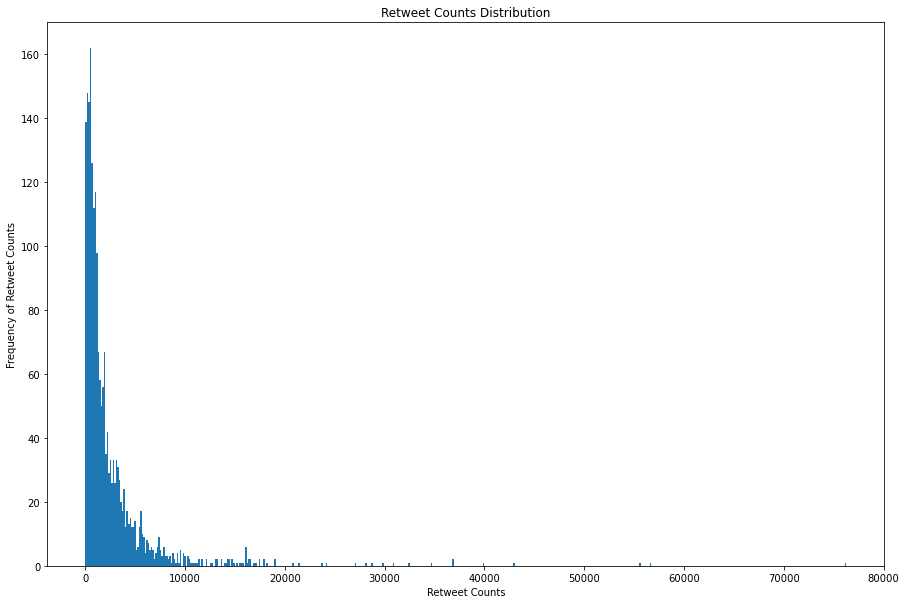

In [62]:
plt.figure(figsize=(15,10));
plt.hist(twitter_archive_clean.retweet_counts, bins = 500);
plt.title('Retweet Counts Distribution')
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency of Retweet Counts')
plt.show();

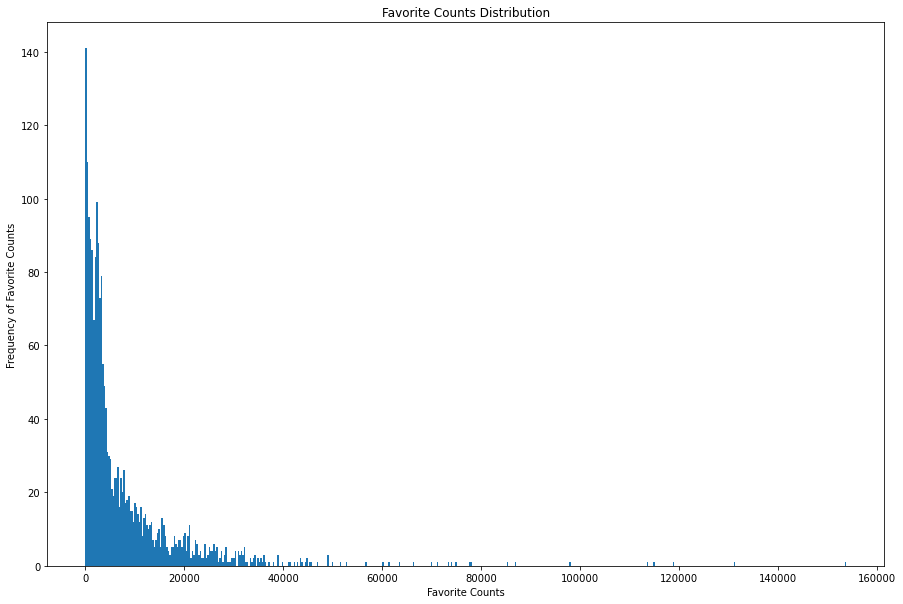

In [63]:
plt.figure(figsize=(15,10));
plt.hist(twitter_archive_clean.favorite_counts, bins = 500);
plt.title('Favorite Counts Distribution')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency of Favorite Counts')
plt.show();

Above plots are showing that the ratio of retweet counts is higher than the favorite counts while the shape of the plot is somehow little bit similar in nature.

### Scatter Plot of Retweet Counts and Favorite Counts

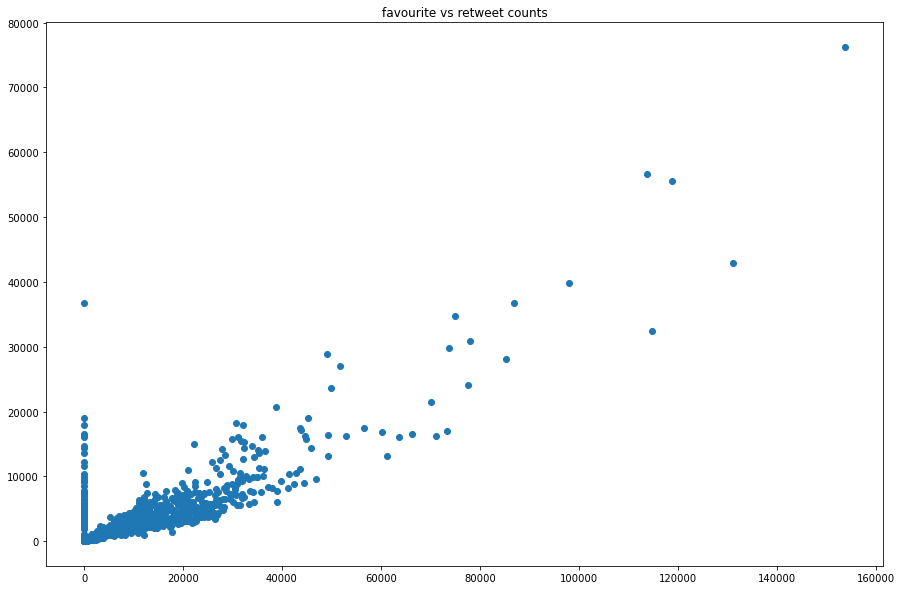

In [69]:
plt.figure(figsize=(15,10))
plt.scatter(twitter_archive_clean.favorite_counts, twitter_archive_clean.retweet_counts)
plt.title('favourite vs retweet counts')
plt.show();

Above scatterplot is suggesting that the retweet counts and favorite counts are correlated with each other.


### Retweet and Favorite Counts Populariy Over Time

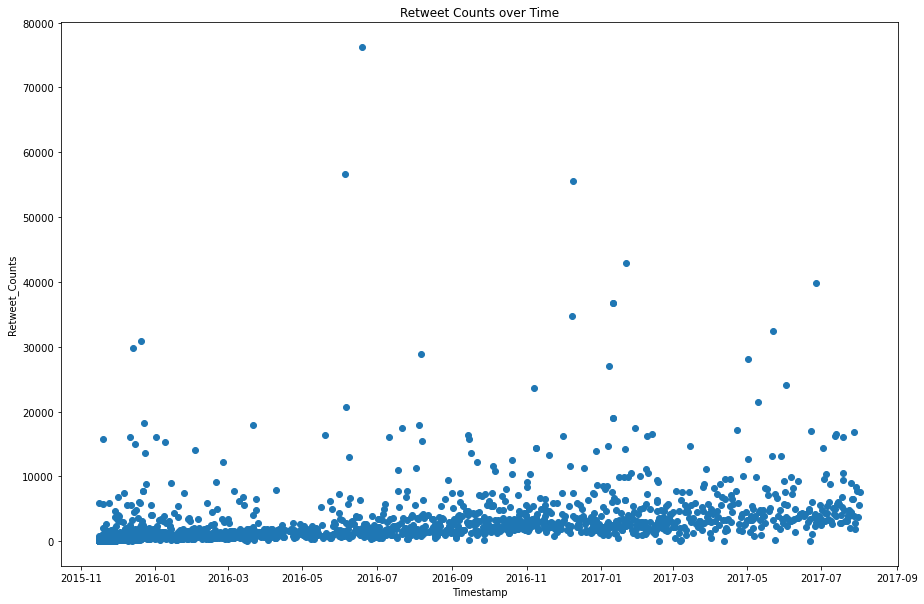

In [70]:
plt.figure(figsize=(15,10))
plt.scatter(twitter_archive_clean.timestamp, twitter_archive_clean.retweet_counts)
plt.title('Retweet Counts over Time')
plt.xlabel("Timestamp")
plt.ylabel("Retweet_Counts")
plt.show()

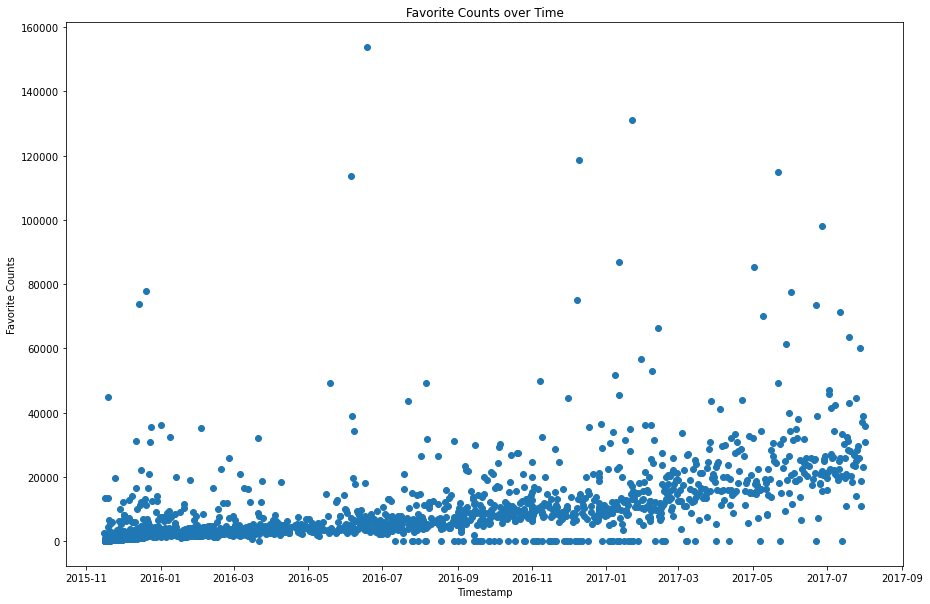

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(twitter_archive_clean.timestamp, twitter_archive_clean.favorite_counts)
plt.title('Favorite Counts over Time')
plt.xlabel("Timestamp")
plt.ylabel("Favorite Counts")
plt.show()

Above plots show the retweet and favorite counts increases in short period of time.

### Main Source of sharing the Dog Pictures

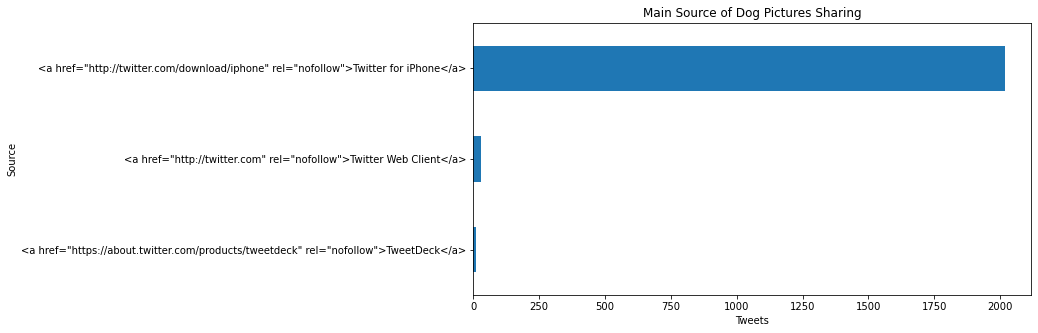

In [67]:
plt.figure(figsize=(10,5))
plt.title("Main Source of Dog Pictures Sharing")
twitter_archive_clean.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Tweets')
plt.ylabel('Source');

Above bar plot shows that the <b>Twitter for iPhone</b> is most common among all other sources to tweet the dog pictures. The above source columns need further cleaning to remove the url tags.